Accuracy: 0.6166666666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.94      0.86        36
           1       0.17      0.11      0.13         9
           2       0.50      0.20      0.29         5
           3       0.17      0.14      0.15         7
           4       0.00      0.00      0.00         3

    accuracy                           0.62        60
   macro avg       0.32      0.28      0.29        60
weighted avg       0.56      0.62      0.58        60



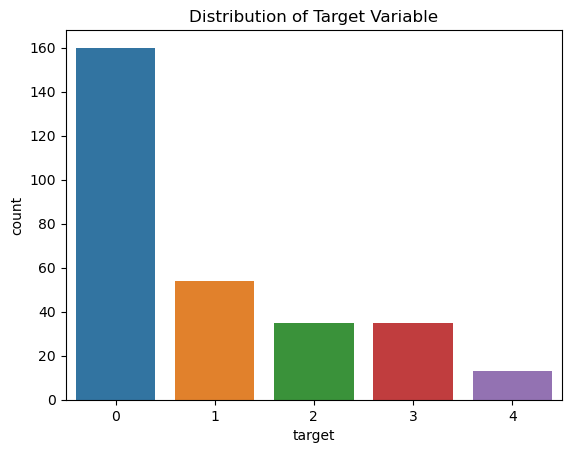

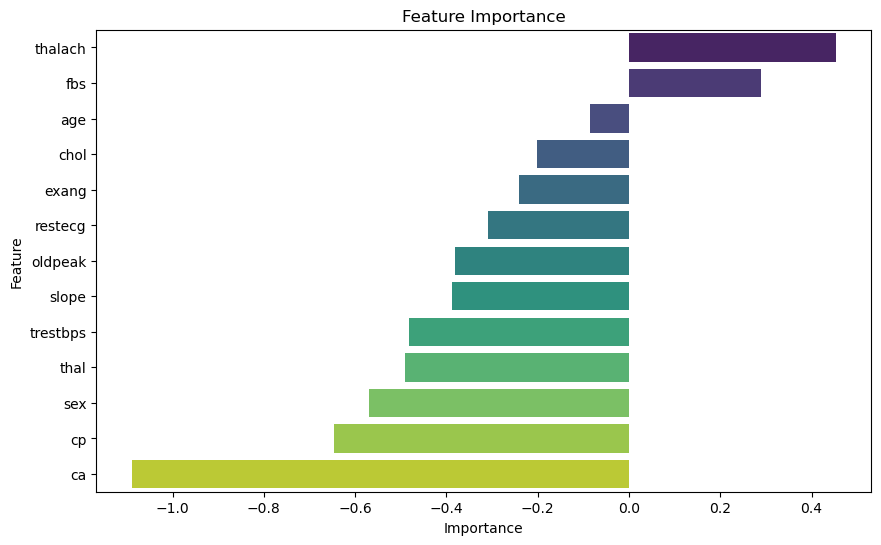

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
data = pd.read_csv(url, names=names)

# Data preprocessing
# Handling missing values
data = data.replace('?', np.nan).dropna()

# Splitting features and target variable
X = data.drop('target', axis=1)
y = data['target']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
sns.countplot(data=data, x='target')
plt.title('Distribution of Target Variable')
plt.show()

# Get feature importance
if hasattr(model, 'coef_'):
    feature_importance = model.coef_[0]
    feature_names = X.columns
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
    plt.title('Feature Importance')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()

1. The Accuracy of model on test data is $83%$ means it correctly predicted the presence or absence of heart disease in $83%$ of cases on test data.
2. The Precision for predicting the presence $.78$ is less than the predicting absence $.89$ means the model is reliable for predicting the patients without heart disease.
3. The Recall for predicting the presence is higher than the Absence which is not good according to our model to be patient reliable but
4. f1-score which is a balances the precision and recall is higher for absence prediction thus we can say our model is patient reliable.
